<a href="https://colab.research.google.com/github/ilman79/predict_salary_Indonesia/blob/main/Predict_salary_Indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library yang dibutuhkan


In [10]:
import gdown
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import NaN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler

In [11]:
!pip install gdown

# Tautan unduhan langsung ke file Google Drive
url = 'https://drive.google.com/uc?export=download&id=1dHgDyO8j_ApN28jt31T2BgiFi3WhVN1U'

# Nama file tujuan
output = '/content/dataset.zip'  # Sesuaikan dengan nama file yang diinginkan

gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1dHgDyO8j_ApN28jt31T2BgiFi3WhVN1U
To: /content/dataset.zip
100%|██████████| 257k/257k [00:00<00:00, 60.0MB/s]


'/content/dataset.zip'

`Melakukan load data atau mendownload data dari gdrive, data ini berasal dari kaggle yang sudah didownload dan diupload ke dalam gdrive tujuannya untuk semua orang bisa mencobanya dan memvalidasi kembali`



In [12]:
# Misalkan dataset berada dalam file zip bernama dataset.zip
zip_path = '/content/dataset.zip'
extracted_path = '/content/dataset'  # Ganti dengan direktori tujuan ekstraksi
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

`Karena data yang kita download berbentuk zip maka harus kita unzipkan terlebih dahulu`



#Loading Data

`Data yang akan digunakan yaitu data water_potability yang bersumber dari kaggel`
[dataset](https://www.kaggle.com/datasets/adityakadiwal/water-potability)

In [13]:
dataset = pd.read_csv("/content/dataset/water_potability.csv")
dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# Explanatory Data Analysis Cleaning Data

`Pertanyaan untuk mengetahui karakteristik data maka ada pertanyaan untuk Explanatory Data Analysis yaitu `

*   `Apa Saja jenis variabel pada dataset`
*   `Apakah ada missing value dan duplikasi pada dataset`
*   `Bagaimana distribusi variabel dataset`
*   `Bagaimana korelasi antar data`

> **Cek Missing Value**



`Tujuan mengecek missing value adalah untuk mengetahui dataset yang kurang lengkap atau dikarenakan human erorr saat diinputkan sehingga kita harus mengecek lagi dan validasi agar kualitas data yang kita gunakan baik`

In [14]:
dataset.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [15]:
dataset.loc[dataset[['ph', 'Sulfate','Trihalomethanes']].isna().any(axis=1)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1



`Dikarenakan pada variabel **ph**,**Sulfate**, dan **Trihalomethanes** masing-masing memiliki dampak pada pengunaan air dan kelayakan air yang akan kita konsumsi maka dari itu, ketiga variabel tersebut kita isi nilai NaNnya dengan rata-rata pada variabel masing-masing.`











> **Mengisi nilai NaN dengan rata-rata**



In [16]:
dataset.ph.fillna(value=dataset.ph.mean(), inplace=True)
dataset.Sulfate.fillna(value=dataset.Sulfate.mean(), inplace=True)
dataset.Trihalomethanes.fillna(value=dataset.Trihalomethanes.mean(), inplace=True)

`Kemudian kita akan cek kembali untuk memastikan tidak ada nilai yang NaN`

In [17]:
dataset.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

`Setelah kita inputkan semua nilai NaN ph dengan rata-rata maka hasilnya nilai NaN adalah 0`



> **Mengecek adanya outlier pada data**





`Dilakukan pengecekan outlier data berguna agar tidak terjadi bias saat analysis berlangsung`

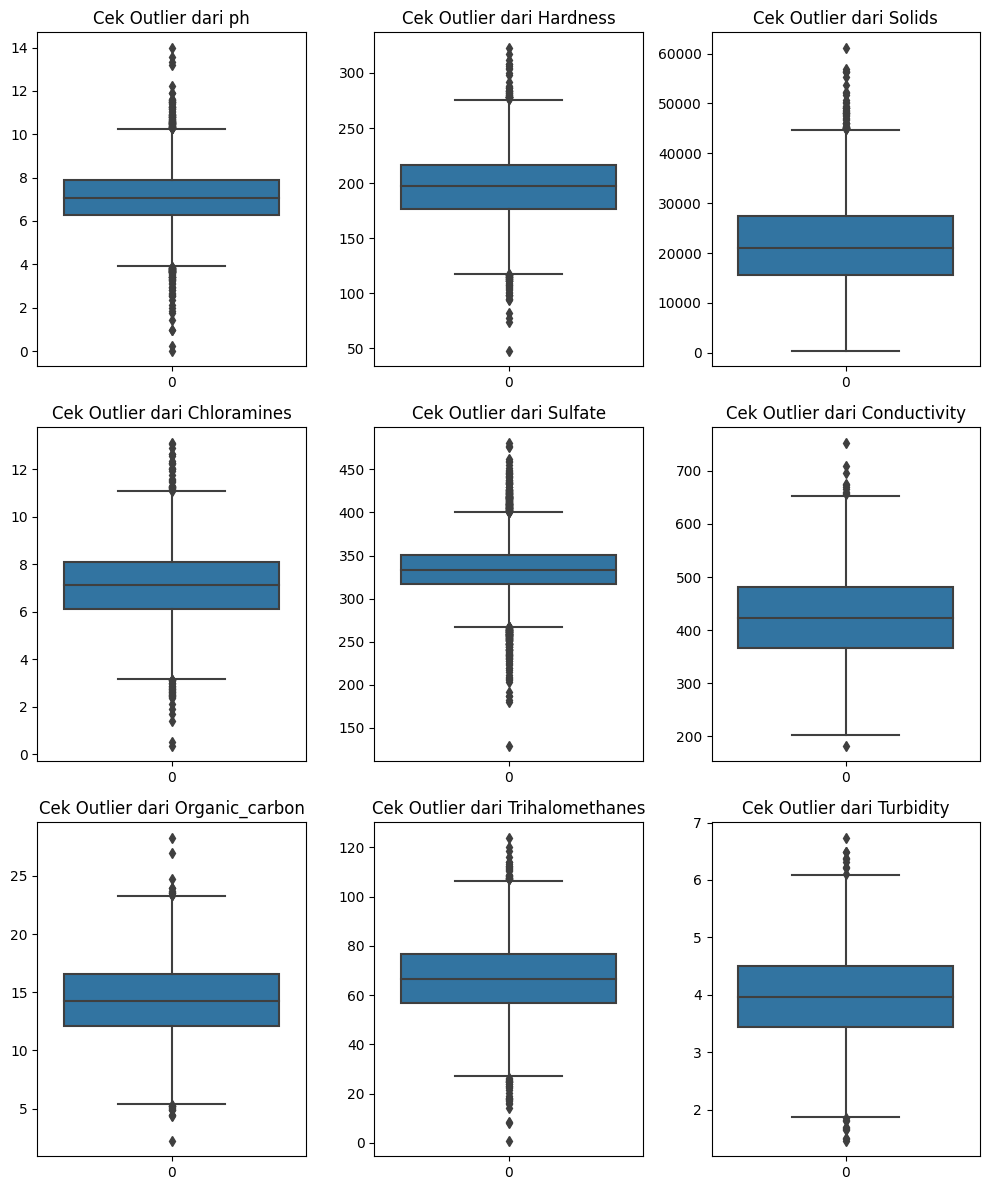

In [18]:
# Menghitung berapa banyak variabel yang akan divisualisasikan dalam satu baris
num_columns = len(dataset.columns)-1

# Menghitung berapa banyak kolom yang akan digunakan
num_cols_per_row = 3  # Anda dapat mengganti jumlah kolom per baris sesuai keinginan

# Menghitung berapa banyak baris yang diperlukan
num_rows = int(np.ceil(num_columns / num_cols_per_row))

# Membuat susunan subplots
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(10, 4*num_rows))

# Melooping setiap variabel dan membuat boxplot
for i, column in enumerate(dataset.columns[:-1]):
    row = i // num_cols_per_row
    col = i % num_cols_per_row
    sns.boxplot(data=dataset[column], ax=axes[row, col])
    axes[row, col].set_title(f'Cek Outlier dari {column}')

# Mengatur tata letak subplot agar rapi
plt.tight_layout()
plt.show()


`Dilihat dari hasil diagram boxplot, beberapa data merupakan outlier sehingga dilakukan normalisasi untuk membersihkan data tetapi kita lihat lagi dari data yang kita punya yaitu untuk mengecek kadar kelayakan dari suatu air yaitu kita melihat air dengan kandungan tersebut layak digunakan atau tidak.`





In [19]:
Q1 = (dataset).quantile(0.25)
Q3 = (dataset).quantile(0.75)
IQR = Q3 - Q1

datasets=dataset[~((dataset<(Q1-1.5*IQR))|(dataset>(Q3+1.5*IQR))).any(axis=1)]
datasets.shape

(2666, 10)

`Setelah dilakukan cleaning outlier maka data yang akan kita gunakan dalam proses analisis lebih lanjut yaitu 2666 data`

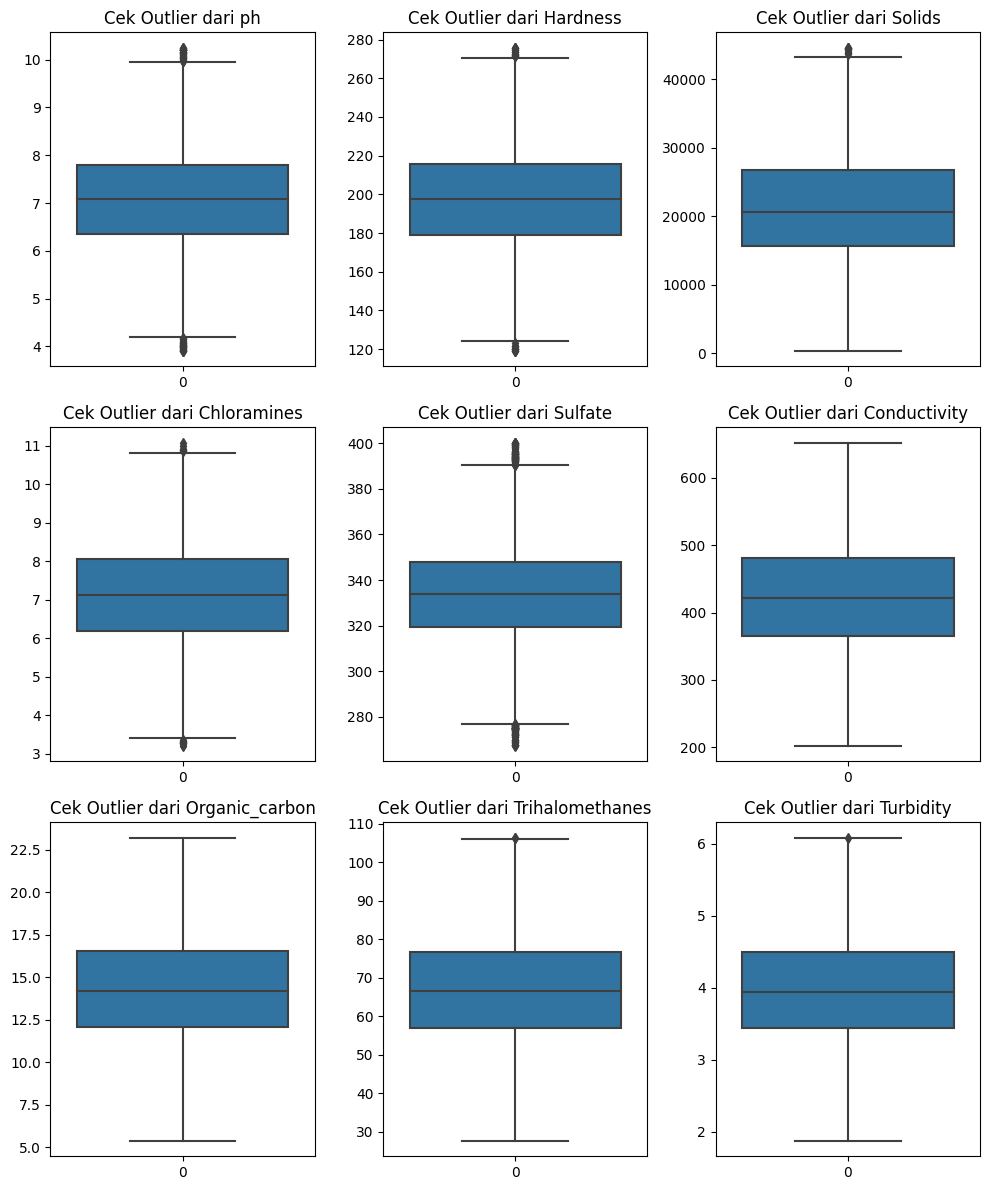

In [20]:
# Menghitung berapa banyak variabel yang akan divisualisasikan dalam satu baris
num_columns = len(datasets.columns)-1

# Menghitung berapa banyak kolom yang akan digunakan
num_cols_per_row = 3  # Anda dapat mengganti jumlah kolom per baris sesuai keinginan

# Menghitung berapa banyak baris yang diperlukan
num_rows = int(np.ceil(num_columns / num_cols_per_row))

# Membuat susunan subplots
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(10, 4*num_rows))

# Melooping setiap variabel dan membuat boxplot
for i, column in enumerate(datasets.columns[:-1]):
    row = i // num_cols_per_row
    col = i % num_cols_per_row
    sns.boxplot(data=datasets[column], ax=axes[row, col])
    axes[row, col].set_title(f'Cek Outlier dari {column}')

# Mengatur tata letak subplot agar rapi
plt.tight_layout()
plt.show()



> **Mengecek Duplikasi Data**



`Tujuan dilakukan duplikasi data adalah untuk mencegah adanya data yang sama`

In [21]:
dataset.duplicated().sum()

0

`Pada dataset tidak ada data yang duplikat sehingga data sudah bisa dianalisis ketahap selanjutnya.`



> **Visualisasi Dataset**



`Visualisasi bertujuan untuk melihat distribusi dataset dan mendapatkan kesimpulan maupun hal-hal yang penting di dalamnya.`

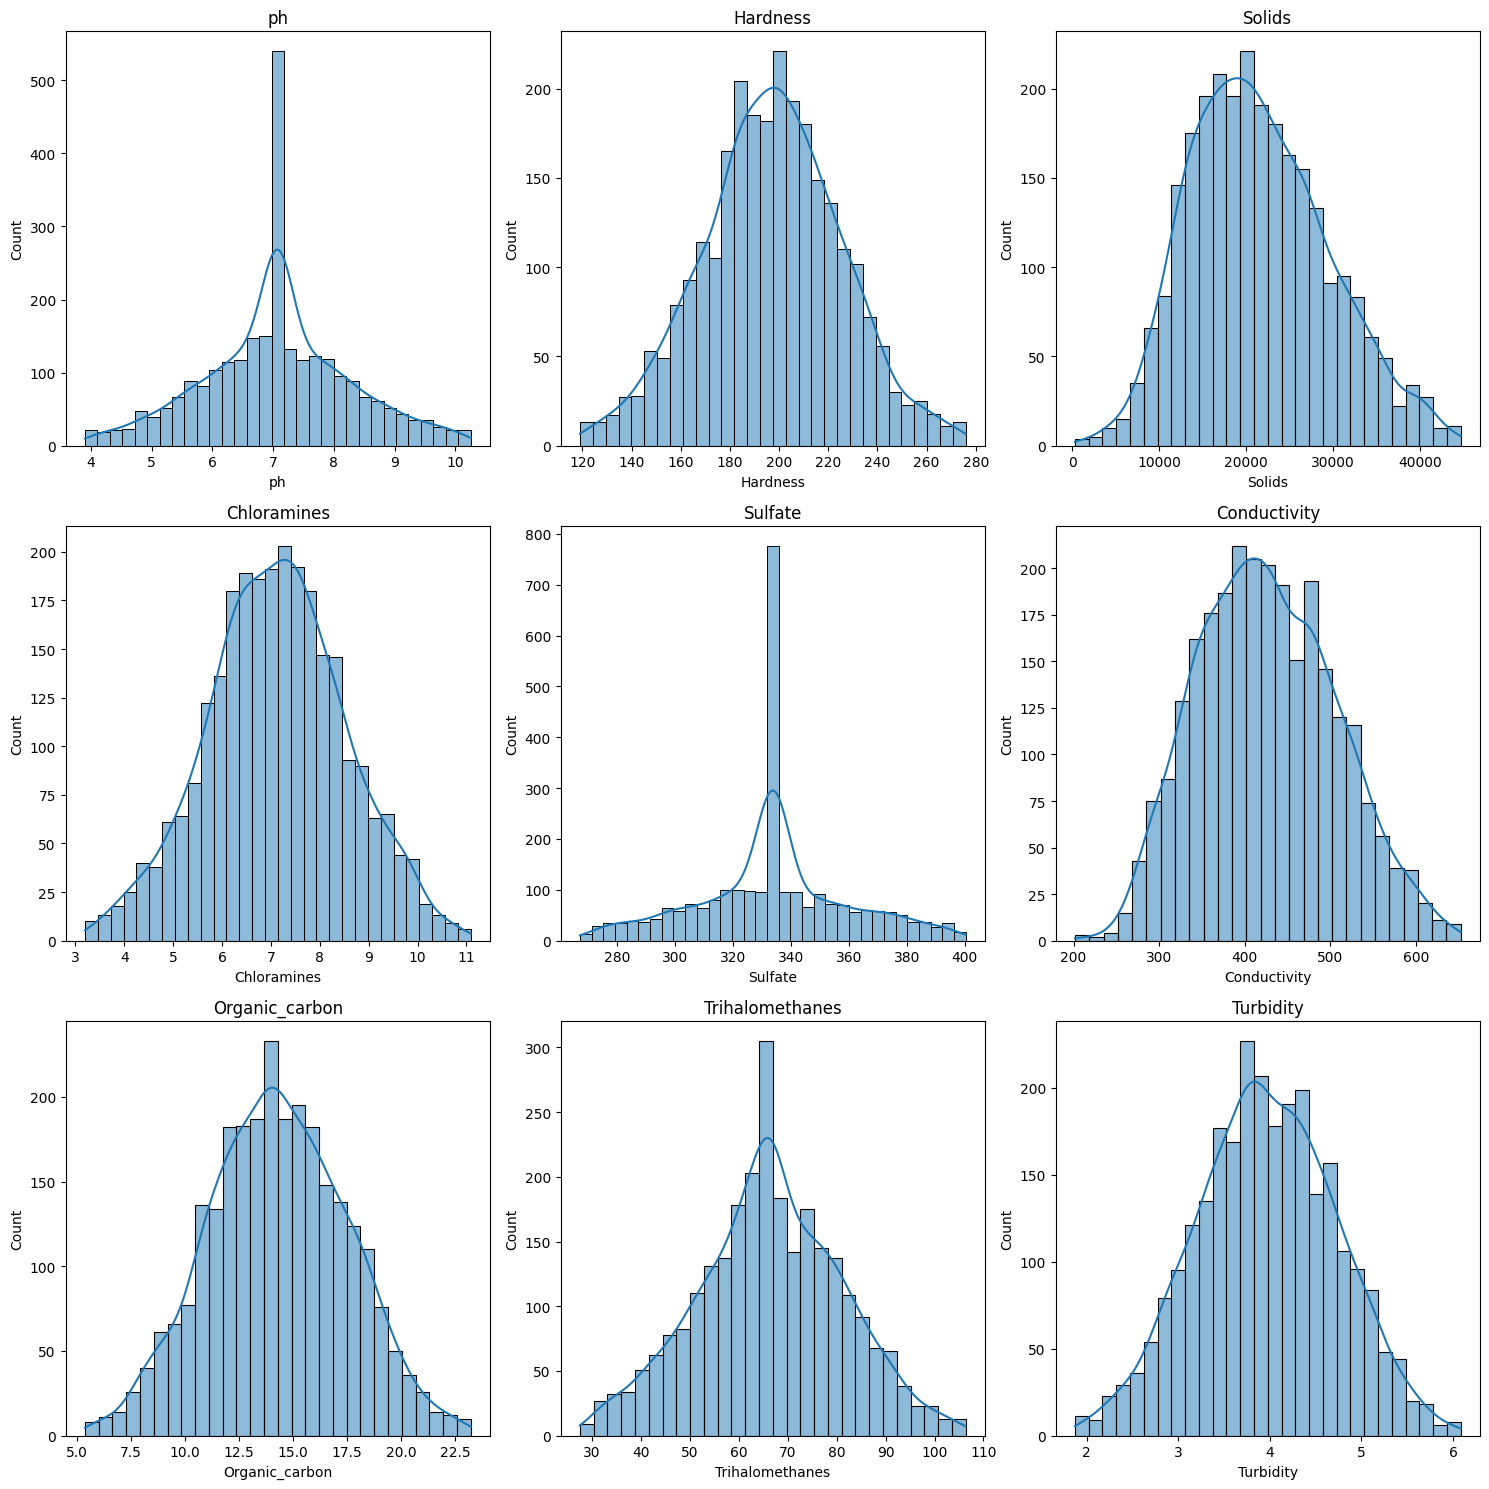

In [22]:
columns = datasets.columns[:-1]  # Menggunakan ".columns" untuk mendapatkan nama kolom
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.ravel()

# Menggunakan loop untuk membuat histogram untuk setiap kolom
for index, column in enumerate(columns):
    sns.histplot(datasets[column], kde=True, ax=axes[index])
    axes[index].set_title(column)

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

`Adapun kesimpulan yang dapat diambil dari grafik di atas yaitu`


*   `Hasilnya semua berdistribusi normal yaitu seperti gambar/grafiknya berbentuk lonceng`
*   `Tidak ada outlier yang terlalu signifikan`



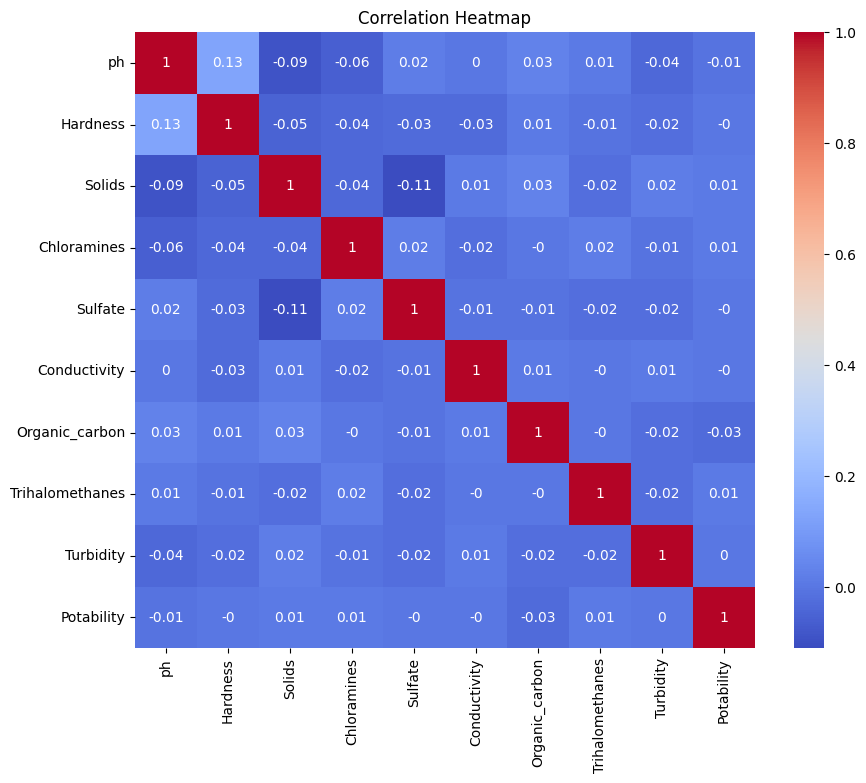

In [23]:
# Menghitung korelasi Pearson antara semua pasangan variabel dalam DataFrame
correlation_matrix = datasets.corr().round(2)

# Membuat heatmap untuk visualisasi korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

`Dilihat dari gambar di atas menunjukkan bahwa korelasi antar variabelnya sangat rendah ini tidak menutup kemungkinan menghambat dalam proses modeling sehingga walaupun korelasi rendah tidak mempengaruhi tahap selanjutnya yaitu modeling`

# Data Preperation dan Modeling

`Proses Data Preperation bertujuan untuk mempersiapkan dataset yang akan dimodeling dikarena setiap model beda dalam perlakuan datanya sehingga yang kita lakukan hanya ngesplit data test, dan train`

In [24]:
X = datasets.iloc[:, 0:8]
y = datasets.iloc[:,9]  # Use the target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)



`
Sudah dilakukan split dataset terbagi menjadi 4 bagian yaitu X_test, X_train, y_test, y_train dan tujuan selanjutnya adalah melakukan develompment model. Dengan data tergetnya variabel potabillity
`


In [25]:
print(f"Jumlah Data X_train : {X_train.shape}")
print(f"Jumlah Data y_train : {y_train.shape}")
print(f"Jumlah Data X_test : {X_test.shape}")
print(f"Jumlah Data y_test : {y_test.shape}")

Jumlah Data X_train : (2132, 8)
Jumlah Data y_train : (2132,)
Jumlah Data X_test : (534, 8)
Jumlah Data y_test : (534,)




> **Development Model**



`Kita melakukan development model dengan 3 pilihan model yang akan kita uji yaitu RandomFosert,KNeighborsRegressor, dan boosting. Ketiga model tersebut adalah model yang sederhana kemudian kita akan bandingkan hasil mse dan evaluasi modelnya dan kita akan memilih model mana yang terbaik untuk digunakan. `

In [26]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

`Melakukan Standarisasi/normalisasi pada dataset dikarena satuan pada tiap variabel berbeda beda sehingga diperlukannya normalisasi dataset`


In [27]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [56]:
# Create and fit the KNeighborsRegressor model
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

`Melakukan Train model pada algoritma knn dengan n_neighbors=10 dan kita akan mendapatkan mse atau nilai error. Apabila nilai erorr semakin kecil maka model bisa dikatakan minim erorr/terjadi kesalahan saat melakukan prediksi`


In [57]:
# buat model prediksi
RF = RandomForestRegressor(n_estimators=20, max_depth=16, random_state=25, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

`Melakukan Train model pada random forest dengan n_estimators=20, max_depth=16, random_state=25, n_jobs=-1 dan kita akan mendapatkan mse atau nilai error. Apabila nilai erorr semakin kecil maka model bisa dikatakan minim erorr/terjadi kesalahan saat melakukan prediksi`


In [58]:
# buat model prediksi
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

`Melakukan Train model pada random forest dengan learning_rate=0.05, random_state=55 dan kita akan mendapatkan mse atau nilai error. Apabila nilai erorr semakin kecil maka model bisa dikatakan minim erorr/terjadi kesalahan saat melakukan prediksi`


In [59]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))
# Panggil mse
mse


,train,test
KNN,0.188007,0.230674
RF,0.061537,0.226092
Boosting,0.223218,0.230699


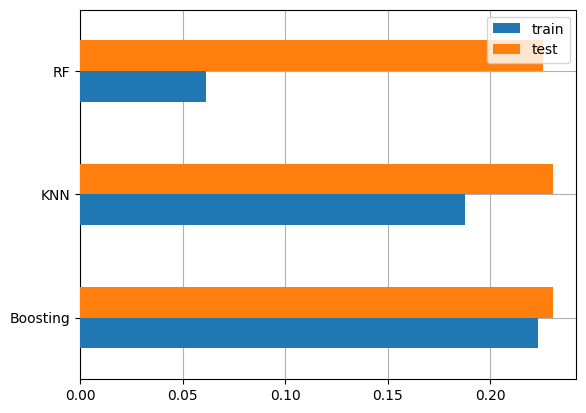

In [60]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

`Kita lihat perbandingan dari mse tiap-tiap model, model dengan mse terkecil yaitu Random Forest dan model dengan mse terbesar yaitu Boosting. Kemudian kita akan mencoba evaluasi model mana yang lebih akurat dengan masing masing memberikan hasil prediksinya sesuai dengan y_true.`

In [74]:
import pandas as pd

# Definisikan fungsi untuk mengubah prediksi probabilitas menjadi nilai 0 atau 1 berdasarkan threshold
def binarize_predictions(predictions, threshold=0.5):
    binarized = [1 if pred >= threshold else 0 for pred in predictions]
    return binarized
# Inisialisasi DataFrame untuk hasil prediksi
prediksi = pd.DataFrame(X_test)

# Inisialisasi kamus untuk hasil prediksi
pred_dict = {'y_true': y_test}

# Loop melalui model-model dalam model_dict
for name, model in model_dict.items():
    predicted_probs = model.predict(prediksi)

    predicted_classes = binarize_predictions(predicted_probs)
    pred_dict['prediksi_' + name] = predicted_classes

# Buat DataFrame dari pred_dict untuk hasil prediksi
hasil_prediksi = pd.DataFrame(pred_dict)
# Tampilkan hasil prediksi
hasil_prediksi.head()

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
424,0,0,1,0
301,1,1,0,0
1813,0,0,0,0
1891,1,1,1,1
1326,0,0,0,0


`Hasil prediksi dari tiap-tiap algoritma machine learningnya. Yang menjadi acuannya adalah y_true, apabila ia bernilai 1 maka air layak digunakan, jika bernilai 0 maka air tidak layak digunakan. lalu kita akan lihat berapa probabilitas prediksi pada masing-masing model`

In [68]:
# Inisialisasi kamus untuk menyimpan hasil evaluasi
evaluation_results = {}

# Loop melalui kolom prediksi_model dalam hasil_prediksi
for name in model_dict.keys():
    predicted_column = 'prediksi_' + name
    correct_predictions = (hasil_prediksi[predicted_column] == hasil_prediksi['y_true']).sum()
    incorrect_predictions = len(hasil_prediksi) - correct_predictions

    evaluation_results[name] = {
        'correct_predictions': correct_predictions,
        'incorrect_predictions': incorrect_predictions,
        'probabilitas_true': correct_predictions/(correct_predictions+incorrect_predictions)
    }

# Buat DataFrame dari evaluation_results untuk hasil evaluasi
hasil_evaluasi = pd.DataFrame.from_dict(evaluation_results, orient='index')

# Tampilkan hasil evaluasi
print(hasil_evaluasi)

          correct_predictions  incorrect_predictions  probabilitas_true
KNN                       328                    206           0.614232
RF                        336                    198           0.629213
Boosting                  339                    195           0.634831


`Dihasilkan bahwa jumlah yang sesuai dengan y_true adalah algoritma Boosting sebesar 0.634831 dan hasil probabilitas terkecil yaitu KNN sebesar 0.614232. Maka dari itu evaluasi model terbaik yang akan digunakan adalah algoritma Boosting yang memiliki probabilitas benar lebih tinggi dari yang lain.`